In [ ]:
!pip install ruwordnet
!ruwordnet download
from ruwordnet import RuWordNet

In [ ]:
!pip uninstall spacy -y
!pip install -U spacy>=3.0
!python -m spacy download ru_core_news_md
import spacy
nlp = spacy.load('ru_core_news_md')

In [ ]:
import nltk
nltk.download ('punkt')
from nltk.tokenize import word_tokenize
import math

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class SenseCounter:

    def __init__(self, text):
        self.text = text
        self.wn = RuWordNet()


    def count_senses(self, product=False):
        document = nlp(self.text)
        outname = path.replace('.txt', '-lemmatized.txt')
        with open(outname, 'w', encoding='utf8') as out:
            for token in document:
                out.write(token.lemma_.lower())
                out.write(' ')
        # path_lem = f"/content/drive/MyDrive/Master's Thesis/data/texts/{text}"
        text_lem = open(outname, encoding='utf-8').read()
        dict_senses = {}
        tokens = nltk.word_tokenize(text_lem)
        for word in tokens:
            dict_senses[word] = []
            for sense in self.wn.get_senses(word):
                dict_senses[word].append(sense.synset)
        len_tokens = len(tokens)
        sense_amount = {}
        for key, val in dict_senses.items():
            sense_amount[key] = len(val)
        only_multiples = {}
        for key, val in sense_amount.items():
            if val > 1:
                only_multiples[key] = val
        multiple_words_amount = len(only_multiples)
        values = []
        for key, val in only_multiples.items():
            values.append(val)
        prod = math.prod(values)
        if product==False:
            print (multiple_words_amount/len_tokens)
        else:
            print(math.log10(prod // len_tokens))


In [ ]:
for file in list_of_files:
  path = f"/content/drive/MyDrive/Thesis/data/texts/{file}"
  # path = "/content/drive/MyDrive/Thesis/data/texts/Tbook(M)_R_R_05_05_ByKi_0_A_0_2015_80486.txt"
  text = open(path, encoding='utf-8').read()
  init_class = SenseCounter(text)
  init_class.count_senses(product=True)
  init_class.count_senses(product=False)

In [ ]:
import csv

fieldnames = ['filename', 'product_senses', 'non_product_senses']


with open('output.csv', mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    for file in list_of_files:
        path = f"/content/drive/MyDrive/Thesis/data/texts/{file}"
        text = open(path, encoding='utf-8').read()
        init_class = SenseCounter(text)

        total_senses, product_senses, non_product_senses = init_class.count_senses(product=True)
        product_senses = product_senses
        non_product_senses = non_product_senses


        writer.writerow({
            'filename': file,
            'product_senses': product_senses,
            'non_product_senses': non_product_senses
        })


In [ ]:
# вычисляем корреляцию (Спирмен)
import scipy
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# создаем список значений p1 и p2
p1_values = [832.6153120060645, 583.8189778864097, 529.4086577623945, 817.2213327166662, 729.8125588762124, 535.6941972876418, 802.9227066498909, 1282.924638598832, 1398.478758634721, 994.6804807672092, 1119.8927617064169, 431.1153419514539, 1576.107087201725, 650.4705797378731, 954.1029058709332, 914.1365094030497, 710.7946300420651, 439.8386968621376, 1220.2645115536654, 586.5938133761618, 440.531850688736, 719.5653300639751, 1398.4723620615714, 1331.7043574797578, 1106.259726965537, 1412.4002200049047, 1328.5165598981769, 853.3623843498743, 737.1897125407885]

p2_values = [0.04791218571534525, 0.040091436609811855, 0.03380747972954016, 0.04426634360001864, 0.0604143316822734, 0.03336880303402363, 0.04179768214895337, 0.04120104155365086, 0.03214480469161078, 0.0550998150694675, 0.0407740044282284, 0.05068478937538908, 0.026601554517331528, 0.052850251751698885, 0.041568921835413344, 0.03951001649339338, 0.043188666279008296, 0.0525130890052356, 0.04381207726524892, 0.05012359764213729, 0.09014232999472852, 0.04612479520146622, 0.03984116005628562, 0.042740757925190026, 0.05595269040811022, 0.030448457242015076, 0.03681024940533666, 0.04950027348217394, 0.04148964579641184]

form = [4, 2, 3, 3, 3, 3, 4, 6, 7, 5, 9, 2, 5, 5, 5, 3, 4, 2, 7, 2, 2, 2, 7, 7, 9, 5, 5, 4, 3]

corr, p_value = spearmanr(p1_values, form)



In [ ]:
print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")


Spearman correlation coefficient: 0.8247209149869186
P-value: 3.7639500996876217e-08


Коэффициент корреляции Спирмена равный 0.824 говорит о том, что есть сильная положительная корреляция между значениями классов p1 и p2. Это означает, что если значение класса p1 увеличивается, то вероятность того, что значение класса p2 также увеличивается, высока.

P-value: 3.7639500996876217e-08 очень мало, что говорит о том, что результат статистически значимый. Это значит, что с высокой вероятностью результат корреляции Спирмена является реальной связью между значениями классов p1 и p2, а не просто случайностью.

In [ ]:
corr, p_value = spearmanr(p2_values, form)

In [ ]:
print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")


Spearman correlation coefficient: -0.26222922296914153
P-value: 0.16937355440911941


Это значит, что между двумя переменными, которые были рассчитаны на коэффициент Спирмена, есть некоторая отрицательная корреляция (значение коэффициента равно -0.262). Однако, p-value (уровень значимости) равен 0.169, что означает, что мы не можем с уверенностью утверждать, что наблюдаемая корреляция статистически значима.

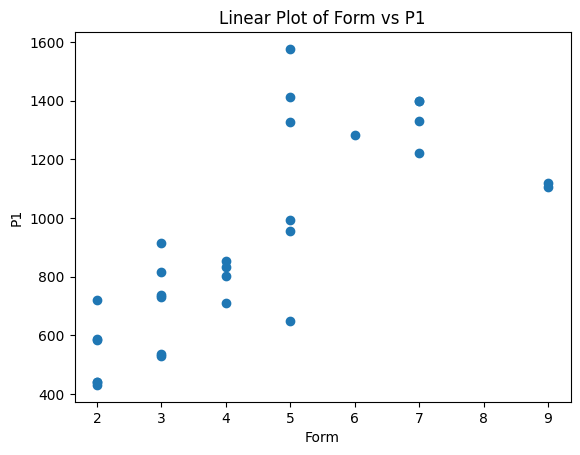

In [ ]:
import matplotlib.pyplot as plt

form = [4, 2, 3, 3, 3, 3, 4, 6, 7, 5, 9, 2, 5, 5, 5, 3, 4, 2, 7, 2, 2, 2, 7, 7, 9, 5, 5, 4, 3]
p1 = [832.6153120060645, 583.8189778864097, 529.4086577623945, 817.2213327166662, 729.8125588762124, 535.6941972876418, 802.9227066498909, 1282.924638598832, 1398.478758634721, 994.6804807672092, 1119.8927617064169, 431.1153419514539, 1576.107087201725, 650.4705797378731, 954.1029058709332, 914.1365094030497, 710.7946300420651, 439.8386968621376, 1220.2645115536654, 586.5938133761618, 440.531850688736, 719.5653300639751, 1398.4723620615714, 1331.7043574797578, 1106.259726965537, 1412.4002200049047, 1328.5165598981769, 853.3623843498743, 737.1897125407885]

plt.plot(form, p1, 'o')
plt.xlabel('Form')
plt.ylabel('P1')
plt.title('Linear Plot of Form vs P1')
plt.show()


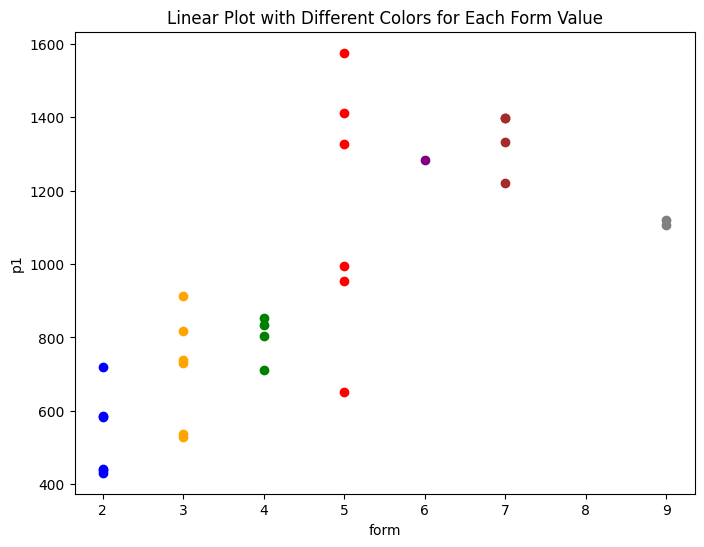

In [ ]:
import matplotlib.pyplot as plt

form = [4, 2, 3, 3, 3, 3, 4, 6, 7, 5, 9, 2, 5, 5, 5, 3, 4, 2, 7, 2, 2, 2, 7, 7, 9, 5, 5, 4, 3]
p1 = [832.6153120060645, 583.8189778864097, 529.4086577623945, 817.2213327166662, 729.8125588762124, 535.6941972876418, 802.9227066498909, 1282.924638598832, 1398.478758634721, 994.6804807672092, 1119.8927617064169, 431.1153419514539, 1576.107087201725, 650.4705797378731, 954.1029058709332, 914.1365094030497, 710.7946300420651, 439.8386968621376, 1220.2645115536654, 586.5938133761618, 440.531850688736, 719.5653300639751, 1398.4723620615714, 1331.7043574797578, 1106.259726965537, 1412.4002200049047, 1328.5165598981769, 853.3623843498743, 737.1897125407885]

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

plt.figure(figsize=(8, 6))
for i in range(len(form)):
    plt.scatter(form[i], p1[i], color=colors[form[i] - 2])
plt.xlabel('form')
plt.ylabel('p1')
plt.title('Linear Plot with Different Colors for Each Form Value')
plt.show()
